<class 'numpy.ndarray'> <class 'numpy.uint8'>
Min/Max: 0 255
Image(height,width,depth): (1200, 2400, 3)


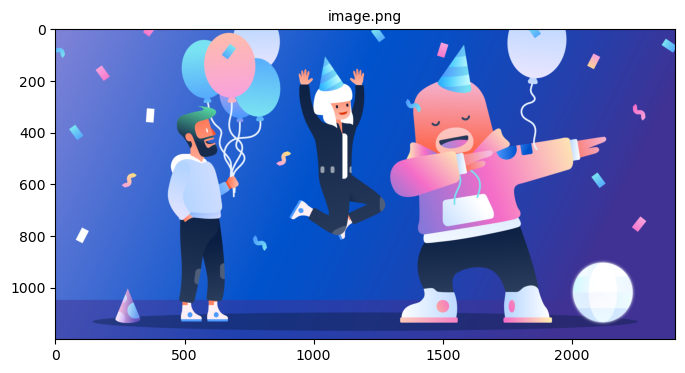

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import urllib
from PIL import Image
import imageio
import scipy.ndimage as nd
from matplotlib.animation import FuncAnimation

# imports statements needed for this notebook
import os
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

# focusing on skimage for this notebook

from skimage import io
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.exposure import rescale_intensity, equalize_adapthist, equalize_hist
from skimage.feature import blob_log, blob_dog
from skimage.draw import line, polygon, disk, circle_perimeter, ellipse, ellipse_perimeter, bezier_curve, set_color
from skimage.util import random_noise
from skimage.restoration import denoise_bilateral

imgdir = 'C:/Users/liamw/Goober/Documents/Schoolwork/7 2022 Spring/CDS 468'

def read_image(imgdir, image_name, display=True):
    '''
    read_image, and optional display
    
    parameters:
    imgdir - directory where image is located
    image_name - name of image to read
    display - boolean indicating whether image should be displayed or not 
    
    returns:
        - image or None if image is not found
    '''
   
    filename = os.path.join(imgdir, image_name)
    
    try:
        img = io.imread(filename)
       
        if display:
            fig, ax = plt.subplots(1,1,figsize=(8,8),dpi=100)
            ax.set_title(image_name, fontsize=10)
            ax.imshow(img)

            # type and dimension
            print(type(img), type(img[0,0,0]))
            print('Min/Max:', np.min(img), np.max(img))
            print('Image(height,width,depth):', img.shape)
        return img
    except:
        return None

png = "https://raw.githubusercontent.com/LiamWhitenack/Image-Processing-Course/main/image.png"
mgdata = imageio.imread(png).astype(np.uint8)
image = read_image(imgdir, 'image.png')

# Homework 3a

<br><br>
1.  Use the image of you choosing, show you image as a grayscale: 7 bit, 5 bit and 3 bit.

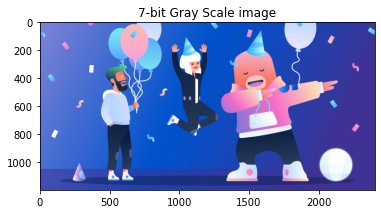

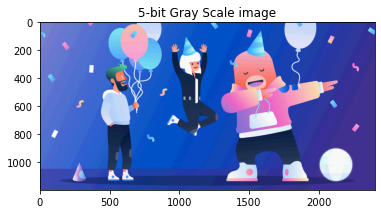

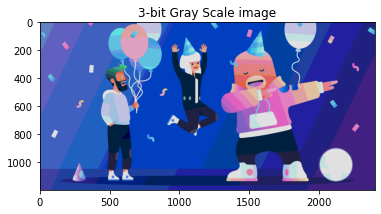

In [2]:
c1 = mgdata & 0xFE # 7 bit
c2 = mgdata & 0xF8 # 5 bit
c3 = mgdata & 0xE0 # 3 bit


plt.title('7-bit Gray Scale image')
plt.imshow(c1, cmap='gray')
plt.show()
plt.title('5-bit Gray Scale image')
plt.imshow(c2, cmap='gray')
plt.show()
plt.title('3-bit Gray Scale image')
plt.imshow(c3, cmap='gray')
plt.show()

<br><br>
2.  Write a script that loads a GIF image and counts the unique color levels therein.

255


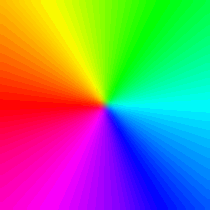

In [3]:
from PIL import Image
im = Image.open("image.gif")

uniqueColors = set()

w, h = im.size
for x in range(w):
    for y in range(h):
        pixel = im.getpixel((x, y))
        uniqueColors.add(pixel)
 
totalUniqueColors = len(uniqueColors)
print(totalUniqueColors)

im

<br><br>
3.  Create a histogram of the intensities of the pixels in your image.</b>

<AxesSubplot:ylabel='Count'>

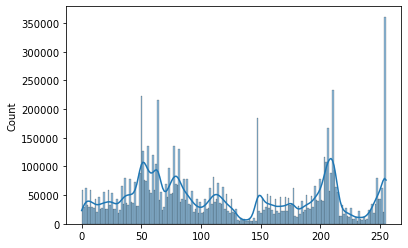

In [4]:
# flatten the image
values = np.ravel(image)

sns.histplot(values, kde=True)

# Homework 3b

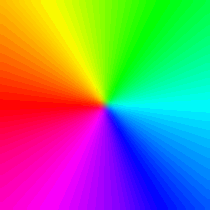

In [5]:
im = Image.open("image.gif").convert('RGB')
im

<br><br>
1. Split the test image into its three R, G, B components and display each component as a gray scale image.

In [6]:
r, g, b = im.split()

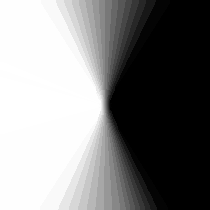

In [7]:
r

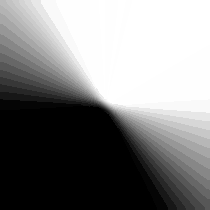

In [8]:
g

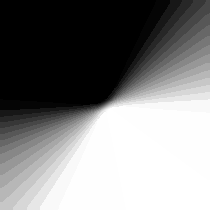

In [9]:
b

<br><br>

2. Load the test image, exchange the RGB components such that the green information is now in the red channel, the blue information is now in the green channel and the red information is now in the blue channel.  Display this color image.

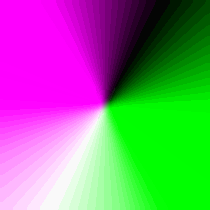

In [10]:
rbr = Image.merge("RGB",(r,b,r))
rbr

<br><br>

3.  Save the image created in #2 to a file.

In [11]:
rbr.save("gif_image_rbr.png", format="png")

<br><br>

4. Convert the test image to the HSV components and display each channel as a gray scale image.

In [12]:
im_HSV = im.convert('HSV')
h, s, v = im_HSV.split()

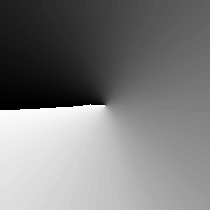

In [13]:
h

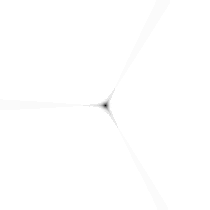

In [14]:
s

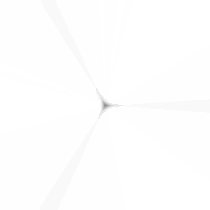

In [15]:
v

<br><br>

5. Convert the test image to YIQ and display each channel as a gray scale image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


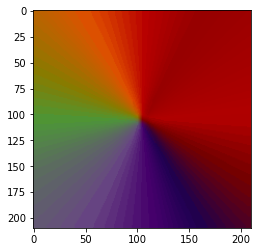

In [17]:
from skimage import io
import skimage
im.save("gif_to_png.png")
gif_to_png = io.imread("gif_to_png.png")
yiq = skimage.color.rgb2yiq(gif_to_png)
plt.imshow(yiq)